In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def _plt(img, cmap,title, fsize,p):
    if p == 0:
        plt.title(title, fontsize=fsize)
        plt.imshow(img, cmap=cmap)
    else:
        plt.imshow(img, cmap=cmap)


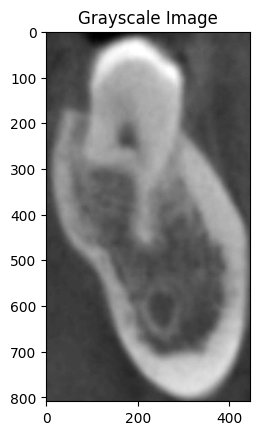

In [4]:
# Read the image in grayscale
image = cv2.imread('M3_Dataset/m3_1_1.jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_plt(gray_image, 'gray', 'Grayscale Image', 12, 0)

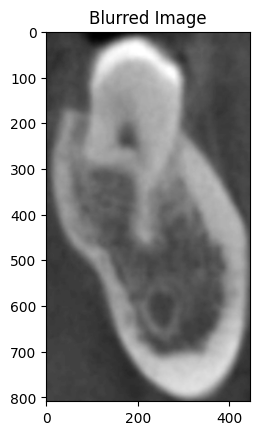

In [5]:
# Noise Removal (Gaussian Blur)
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
_plt(blurred_image, 'gray', 'Blurred Image', 12, 0)


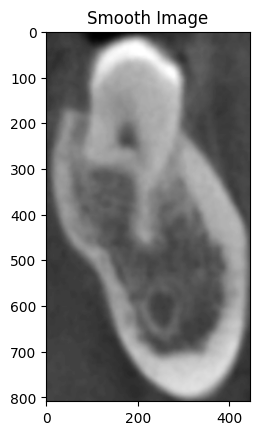

In [6]:
# Smoothen Image (Median Blur)
smooth_image = cv2.medianBlur(blurred_image, 5)
_plt(smooth_image, 'gray', 'Smooth Image', 12, 0)


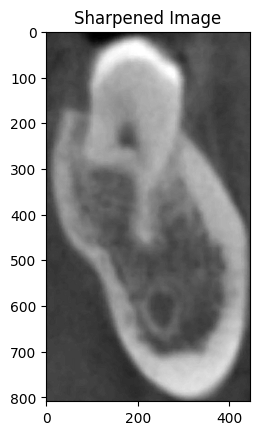

In [7]:
# Sharpen Image
kernel = np.array([[-1, -1, -1],
                  [-1, 9, -1],
                  [-1, -1, -1]])
sharpened_image = cv2.filter2D(smooth_image, -1, kernel)
_plt(sharpened_image, 'gray', 'Sharpened Image', 12, 0)


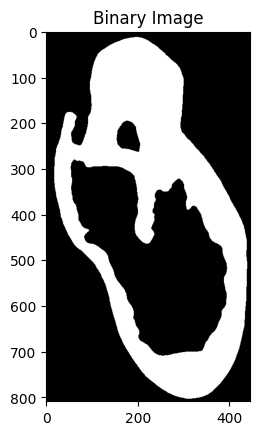

In [8]:
# Binarization (Simple Thresholding)
_, binary_image = cv2.threshold(smooth_image, 127, 255, cv2.THRESH_BINARY)
_plt(binary_image, 'gray', 'Binary Image', 12, 0)

Text(0.5, 1.0, 'Dilated')

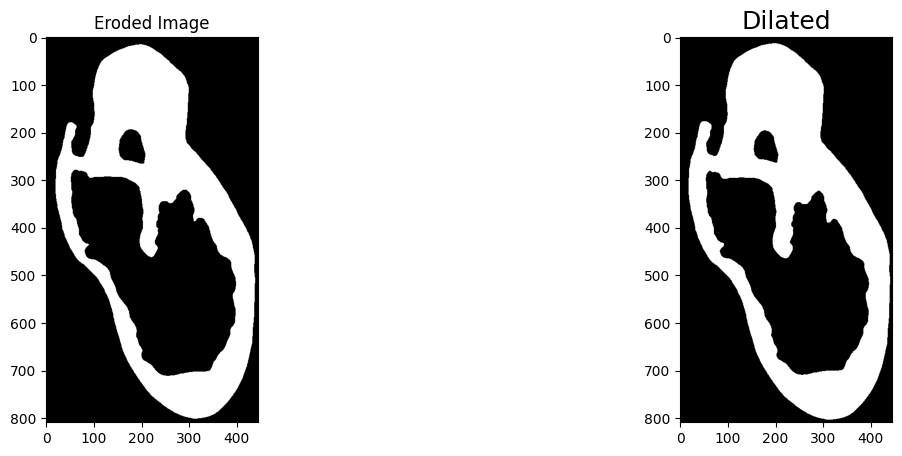

In [9]:
# Erosion and Dilation
kernel = np.ones((5, 5), np.uint8)
eroded_image = cv2.erode(binary_image, kernel, iterations=1)
dilated_image = cv2.dilate(eroded_image , kernel, iterations=1) 

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121)
_plt(eroded_image, 'gray', 'Eroded Image', 12, 0)


ax = fig.add_subplot(122)
_plt(dilated_image, 'gray', 'Dilated Image', 12, 1)
ax.set_title('Dilated', fontsize=18)


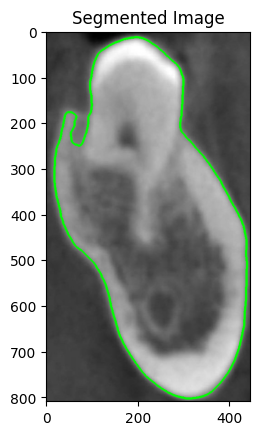

In [10]:
# Contour Detection (Segmentation)
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
segmented_image = image.copy()
cv2.drawContours(segmented_image, contours, -1, (0, 255, 0), 3)
_plt(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB), 'gray', 'Segmented Image', 12, 0)

Text(0.5, 1.0, 'Dilated')

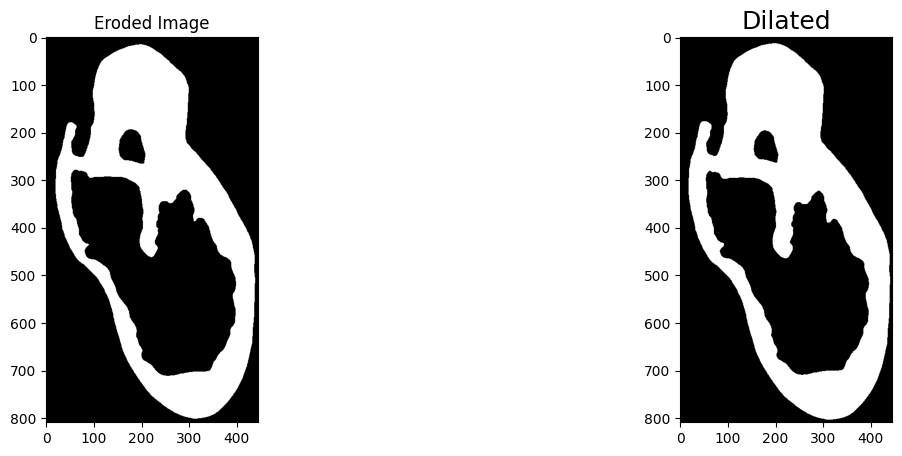

In [11]:
# Create a region-specific threshold mask using the binary image
x1, y1, x2, y2 = 203, 600, 308, 686  # Specify the region coordinates
threshold_roi = 180  # Adjust this threshold value as needed

# Apply a different threshold value within the binary image ROI
roi = binary_image[y1:y2, x1:x2]
roi[roi == 255] = 0  # Set the region outside the mask to black
roi[roi == 0] = 255  # Set the region inside the mask to white
roi[roi == threshold_roi] = 255  # Set the region where the specified threshold should be applied

# Replace the original binary image's region with the thresholded region
binary_image[y1:y2, x1:x2] = roi

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(121)
_plt(eroded_image, 'gray', 'Eroded Image', 12, 0)

ax = fig.add_subplot(122)
_plt(dilated_image, 'gray', 'Dilated Image', 12, 1)
ax.set_title('Dilated', fontsize=18)

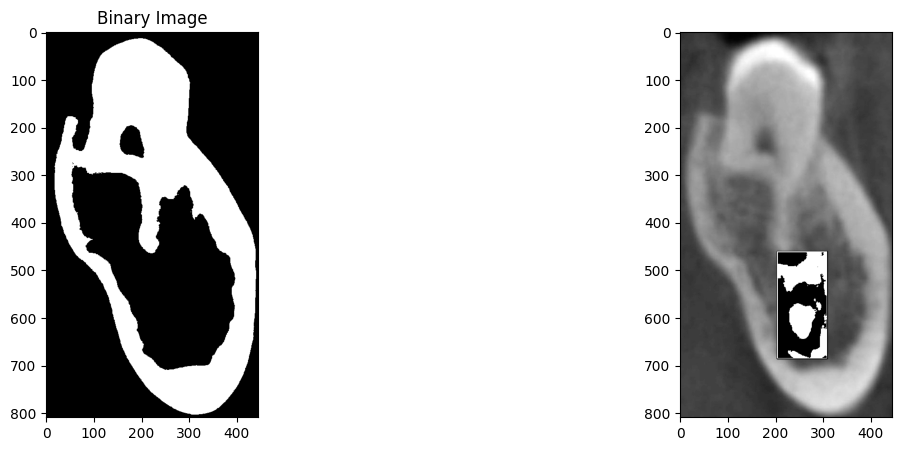

In [12]:

# Read the image in grayscale
image = cv2.imread('M3_Dataset/m3_1_1.jpg', cv2.IMREAD_GRAYSCALE)

# Define the region of interest (ROI) on the grayscale image
x1, y1, x2, y2 = 203, 461, 308, 686  # Specify the region coordinates

# Create a copy of the grayscale image
roi_image = image.copy()

# Draw a green rectangle border around the ROI
roi_image = cv2.rectangle(roi_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Apply a threshold value of 90 within the ROI using binary inverse
threshold_roi = 80  # Set the threshold value to 80
roi = roi_image[y1:y2, x1:x2]
_, binary_inverse_roi = cv2.threshold(roi, threshold_roi, 255, cv2.THRESH_BINARY_INV)
roi_image[y1:y2, x1:x2] = binary_inverse_roi

# Convert the grayscale image to binary
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(121)
_plt(binary_image, 'gray', 'Binary Image', 12, 0)

ax = fig.add_subplot(122)
_plt(roi_image, 'gray', 'Mandibular Canal Detected (Binary Inverse Threshold)', 12, 1)
